In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

sns.set_theme(style="whitegrid")

In [5]:
selAd = pd.read_csv('data/SelAd.csv')
semAd = pd.read_csv('data/SemAd.csv')

In [ ]:
def process_csv(df, outpath):
    df['final'] = df['transcript'].str.split().str[-1].str[0].str.lower()
    df['outcome'] = np.where(
        df['final'] == 'p', 'voiceless', np.where(
            df['final'] == 'b','voiced', 'neither'
        )
    )
    df['bin_case'] = np.where(
        df['final'] == 'p', 0, np.where(
            df['final'] == 'b', 1, None
        )
    )

    df.to_csv(outpath, index = False)
    return df

selAd = process_csv(selAd, 'data/SelAd_whisper_eval.csv')
semAd = process_csv(semAd, 'data/SemAd_whisper_eval.csv')

[Text(0.5, 0, 'Step (P >>> B)'), Text(0, 0.5, 'P(Voiced response)')]

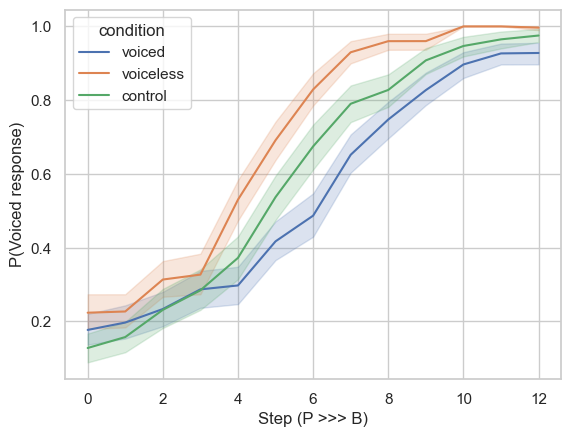

In [7]:


# Plot the responses for different events and regions
p = sns.lineplot(
    x="target_step", 
    y="bin_case",
    hue="condition", 
    data=selAd.reset_index(drop=True)
)
p.set(
    xlabel='Step (P >>> B)', 
    ylabel='P(Voiced response)')


[Text(0.5, 0, 'Step (P >>> B)'), Text(0, 0.5, 'P(Voiced response)')]

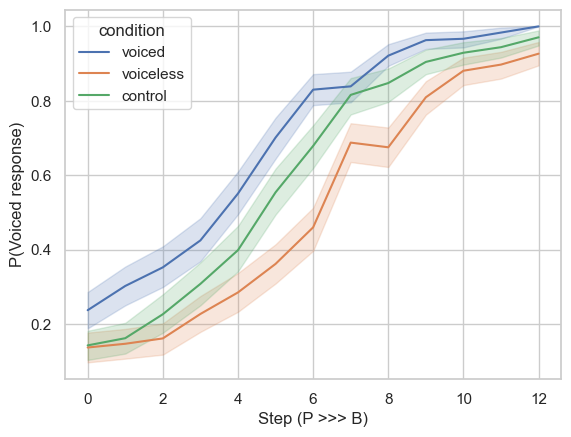

In [8]:
p = sns.lineplot(
    x="target_step", 
    y="bin_case",
    hue="condition", 
    data=semAd.reset_index(drop=True)
)
p.set(
    xlabel='Step (P >>> B)', 
    ylabel='P(Voiced response)')